In [2]:
import pymatgen.core as pmg
from pymatgen.ext.matproj import MPRester
from pymatgen.io.cif import CifParser
from pymatgen.core.composition import Composition, ChemicalPotential
import pandas as pd

import warnings
warnings.simplefilter('ignore')

In [27]:
#Li元素を取得
li = pmg.Element("Li")

In [4]:
#原子量
li.atomic_mass

6.941

In [5]:
#融点(K:ケルビン)
li.melting_point

453.69

In [6]:
# 取得可能な元素の属性値の中で、数値データを返す属性のリスト
list_attrs_numel = ["molar_volume", "boiling_point", "bulk_modulus",
                    "vickers_hardness", "superconduction_temperature",
                    "poissons_ratio", "rigidity_modulus", "density_of_solid",
                    "mendeleev_no", "critical_temperature", "velocity_of_sound",
                    "mineral_hardness", "van_der_waals_radius",
                    "electrical_resistivity", "brinell_hardness",
                    "melting_point", "liquid_range", 
                    "coefficient_of_linear_thermal_expansion",
                    "youngs_modulus", "refractive_index", "reflectivity",
                    "atomic_radius_calculated", "thermal_conductivity"]

In [33]:
li.youngs_modulus

4.9

In [7]:
# Liの属性値を取得
ac_data_array = [[getattr(pmg.Element('Li'), attr) for attr in list_attrs_numel]]
df_ac_attrs = pd.DataFrame(ac_data_array, columns=list_attrs_numel).fillna(0.) # データが None のものは0.0と表示させる
df_ac_attrs

,molar_volume,boiling_point,bulk_modulus,vickers_hardness,superconduction_temperature,poissons_ratio,rigidity_modulus,density_of_solid,mendeleev_no,critical_temperature,...,electrical_resistivity,brinell_hardness,melting_point,liquid_range,coefficient_of_linear_thermal_expansion,youngs_modulus,refractive_index,reflectivity,atomic_radius_calculated,thermal_conductivity
0,13.02,1615.0,11.0,0.0,0.0,0.0,4.2,535.0,12.0,3223.0,...,9.500000e-08,0.0,453.69,1161.31,0.000046,4.9,0.0,0.0,1.67,85.0


## Matrial Projectからデータを取得

In [8]:
# API_KEYを読み込む
with open("MaterialsAPI_key.txt", "r") as file: # MaterialsAPI_key.txt へのパスは自分の環境に合わせて変更する
    API_KEY = file.read()

In [45]:
from pymatgen.electronic_structure.plotter import BSPlotter
# Helpful function for plotting a bandstructure. 
def plot_bandstructure(bs):
    BSPlotter(bs).get_plot().show() 

AttributeError: 'Axes' object has no attribute 'show'

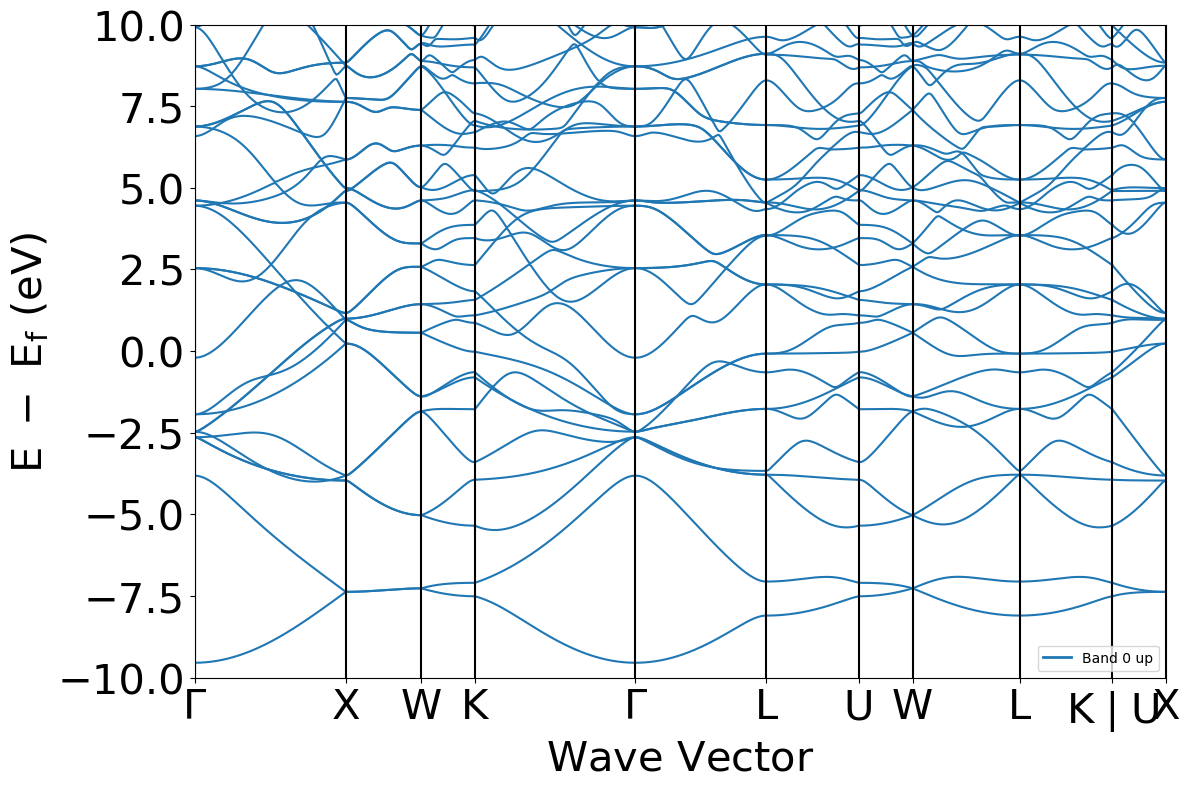

In [46]:
#reference : https://workshop.materialsproject.org/lessons/04_materials_api/MAPI%20Lesson%20%28filled%29/

with MPRester(API_KEY) as mpr:
    bs = mpr.get_bandstructure_by_material_id("mp-1234")

plot_bandstructure(bs) 

In [42]:
# Materials Projectのデータベースからデータを取得する
with MPRester(API_KEY) as m:
     data = m.query(criteria="LiCoO2",properties=['id', 'formula','spacegroup','band_gap']) #LiCoO2(コバルト酸リチウム)のデータを取得する
     
print("ヒットした件数：", len(data), "\n")

for i in range(min(len(data),7)):
    print(f"{i+1}番目のデータ：{data[i]}\n")

AttributeError: '_MPResterLegacy' object has no attribute 'materials'

In [17]:
# 1番目のデータの分子式をComposition のインスタンスに変換する
comp = Composition.from_dict(data[0]['formula']) 
comp

Composition('Li1 Co1 O2')

In [18]:
# 正規化された分子式（組成式）を取得
comp.reduced_formula

'LiCoO2'

In [19]:
# 組成内に含まれる原子の総数を取得
comp.num_atoms

4.0

In [20]:
# 化合物構造の数値化
print(comp.get_atomic_fraction(pmg.Element('Li')))
print(comp.get_atomic_fraction(pmg.Element('Co')))
print(comp.get_atomic_fraction(pmg.Element('O')) * 2)

0.25
0.25
1.0


In [21]:
# 元素の重量分率を計算
print(comp.get_wt_fraction(pmg.Element('Li')))
print(comp.get_wt_fraction(pmg.Element('Co')))
print(comp.get_wt_fraction(pmg.Element('O')))

0.07091843873787657 
0.6021394869953658 
0.32694207426675764 


In [22]:
#CIFの取得
# Materials Projectのデータベースからデータを取得する
with MPRester(API_KEY) as m:
    data = m.get_data("LiCoO2") # LiCoO2のCIFを取得する
    
print("ヒットした件数：", len(data), "\n")    

print("1番目のデータ")
df = pd.DataFrame(data)
cif = df["cif"].iloc[0]
print(cif)

ヒットした件数： 7 

1番目のデータ
# generated using pymatgen
data_LiCoO2
_symmetry_space_group_name_H-M   'P 1'
_cell_length_a   2.93855004
_cell_length_b   2.93855004
_cell_length_c   9.85992500
_cell_angle_alpha   90.00000000
_cell_angle_beta   90.00000000
_cell_angle_gamma   120.00000097
_symmetry_Int_Tables_number   1
_chemical_formula_structural   LiCoO2
_chemical_formula_sum   'Li2 Co2 O4'
_cell_volume   73.73444592
_cell_formula_units_Z   2
loop_
 _symmetry_equiv_pos_site_id
 _symmetry_equiv_pos_as_xyz
  1  'x, y, z'
loop_
 _atom_site_type_symbol
 _atom_site_label
 _atom_site_symmetry_multiplicity
 _atom_site_fract_x
 _atom_site_fract_y
 _atom_site_fract_z
 _atom_site_occupancy
  Li  Li0  1  0.66666700  0.33333300  0.25820800  1
  Li  Li1  1  0.33333300  0.66666700  0.75820800  1
  Co  Co2  1  0.66666700  0.33333300  0.00051300  1
  Co  Co3  1  0.33333300  0.66666700  0.50051300  1
  O  O4  1  0.00000000  0.00000000  0.88676700  1
  O  O5  1  0.00000000  0.00000000  0.38676700  1
  O  O6  1 

In [25]:
df

,energy,energy_per_atom,volume,formation_energy_per_atom,nsites,unit_cell_formula,pretty_formula,is_hubbard,elements,nelements,...,cif,total_magnetization,material_id,oxide_type,tags,elasticity,piezo,diel,deprecated,full_formula
0,-45.071766,-5.633971,73.734446,-1.725328,8,"{'Li': 2.0, 'Co': 2.0, 'O': 4.0}",LiCoO2,True,"[Co, Li, O]",3,...,# generated using pymatgen\ndata_LiCoO2\n_symm...,0.000012,mp-753473,oxide,[],None,"{'eij_max': 0.6380950125602382, 'piezoelectric...","{'e_electronic': [[7.588962851763275, 4.396450...",False,Li2Co2O4
1,-89.470143,-5.591884,138.977662,-1.683241,16,"{'Li': 4.0, 'Co': 4.0, 'O': 8.0}",LiCoO2,True,"[Co, Li, O]",3,...,# generated using pymatgen\ndata_LiCoO2\n_symm...,2.500000,mp-1097885,oxide,[],None,None,None,False,Li4Co4O8
2,-112.089879,-5.604494,167.511784,-1.695851,20,"{'Li': 5.0, 'Co': 5.0, 'O': 10.0}",LiCoO2,True,"[Co, Li, O]",3,...,# generated using pymatgen\ndata_LiCoO2\n_symm...,0.800000,mp-867664,oxide,[],None,None,None,False,Li5Co5O10
3,-91.119296,-5.694956,138.634284,-1.786313,16,"{'Li': 4.0, 'Co': 4.0, 'O': 8.0}",LiCoO2,True,"[Co, Li, O]",3,...,# generated using pymatgen\ndata_LiCoO2\n_symm...,0.000064,mp-849273,oxide,[],None,None,None,False,Li4Co4O8
4,-89.921952,-5.620122,138.593568,-1.711479,16,"{'Li': 4.0, 'Co': 4.0, 'O': 8.0}",LiCoO2,True,"[Co, Li, O]",3,...,# generated using pymatgen\ndata_LiCoO2\n_symm...,1.998465,mp-853240,oxide,[],None,None,None,False,Li4Co4O8
5,-21.183504,-5.295876,34.567267,-1.588639,4,"{'Li': 1.0, 'Co': 1.0, 'O': 2.0}",LiCoO2,True,"[Co, Li, O]",3,...,# generated using pymatgen\ndata_LiCoO2\n_symm...,0.175261,mp-1222334,oxide,[],None,None,None,False,Li1Co1O2
6,-22.005846,-5.501462,33.003036,-1.592819,4,"{'Li': 1.0, 'Co': 1.0, 'O': 2.0}",LiCoO2,True,"[Co, Li, O]",3,...,# generated using pymatgen\ndata_LiCoO2\n_symm...,3.995203,mp-22526,oxide,"[Lithium iron(III) oxide, High pressure experi...",None,None,None,False,Li1Co1O2


In [23]:
# CIFから化合物構造に関するデータを抜き出す
LiCoO2_cif = CifParser.from_str(cif)
CifParser.get_structures(LiCoO2_cif)

[Structure Summary
 Lattice
     abc : 2.9385499969163167 2.93855004 9.859925
  angles : 90.00000000000001 90.0 119.99999951500001
  volume : 73.73444576821352
       A : -1.4692749769163171 -2.544858960057402 -3.598685900620327e-16
       B : -1.4692750630836828 2.544858960057402 1.7993429503101635e-16
       C : 0.0 0.0 -9.859925
     pbc : True True True
 PeriodicSite: Li0 (Li) (-1.469, 0.8483, -7.314) [0.3333, 0.6667, 0.7418]
 PeriodicSite: Li1 (Li) (-1.469, -0.8483, -2.384) [0.6667, 0.3333, 0.2418]
 PeriodicSite: Co2 (Co) (-1.469, 0.8483, -9.855) [0.3333, 0.6667, 0.9995]
 PeriodicSite: Co3 (Co) (-1.469, -0.8483, -4.925) [0.6667, 0.3333, 0.4995]
 PeriodicSite: O4 (O) (0.0, 0.0, -1.116) [0.0, 0.0, 0.1132]
 PeriodicSite: O5 (O) (0.0, 0.0, -6.046) [0.0, 0.0, 0.6132]
 PeriodicSite: O6 (O) (-1.469, 0.8483, -3.811) [0.3333, 0.6667, 0.3866]
 PeriodicSite: O7 (O) (-1.469, -0.8483, -8.741) [0.6667, 0.3333, 0.8866]]

In [24]:
data[0]

{'energy': -45.07176593,
 'energy_per_atom': -5.63397074125,
 'volume': 73.73444592182094,
 'formation_energy_per_atom': -1.725327844791666,
 'nsites': 8,
 'unit_cell_formula': {'Li': 2.0, 'Co': 2.0, 'O': 4.0},
 'pretty_formula': 'LiCoO2',
 'is_hubbard': True,
 'elements': ['Co', 'Li', 'O'],
 'nelements': 3,
 'e_above_hull': 0.0609852606250012,
 'hubbards': {'Li': 0.0, 'Co': 3.32, 'O': 0.0},
 'is_compatible': True,
 'spacegroup': {'symprec': 0.1,
  'source': 'spglib',
  'symbol': 'P6_3mc',
  'number': 186,
  'point_group': '6mm',
  'crystal_system': 'hexagonal',
  'hall': 'P 6c -2c'},
 'task_ids': ['mp-801836',
  'mp-809202',
  'mp-765899',
  'mp-808542',
  'mp-1117433',
  'mp-753473',
  'mp-826709',
  'mp-825957',
  'mp-828881',
  'mp-1408054'],
 'band_gap': 0.8956,
 'density': 4.408304144170691,
 'icsd_id': None,
 'icsd_ids': [],
 'cif': "# generated using pymatgen\ndata_LiCoO2\n_symmetry_space_group_name_H-M   'P 1'\n_cell_length_a   2.93855004\n_cell_length_b   2.93855004\n_cell_le